# <center>Metody Numeryczne</center>

# Laboratorium 7: Pierwiastki wielomianu i wartości własne


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań nieliniowych. W związku z tym podczas zajęć będziemy rozważać następujący problem:

Dana jest funkcja $f(x)$. Należy wyznaczyć takie jej argumenty $x^*$, dla których zachodzi równość $f(x^*) = 0$. 

Argumenty spełniające powyższe równanie nazywane są *pierwiastkami równania*.

<br>

**Wielomian**

Dany jest wielomian $w(x)$ w postaci kanonicznej (ogólnej):

$$
w(x) = a_nx^n + a_{n-1}x^{n-1} + \ldots + a_2x^2 + a_1x + a_0
$$

jego wektor współczynników wyraża się wzorem:

$$
\mathbf{a} = (a_0, a_1, ..., a_{n-1}, a_n)
$$


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`,
    - `nppoly` - `numpy.polynomial.polynomial`.

---

In [2]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as nppoly

---

### **Zadanie 1.**

Dane są wielomiany w postaci iloczynowej:
$$
\begin{align*}
w_1(x) &= (x-1)(x-2)(x-3)\\
w_2(x) &= (x-1)(x-2) \cdot \ldots \cdot (x-20)
\end{align*}
$$

**Punkt 1.**

1. Oblicz wektor współczynników $\mathbf{a}_1$ wielomianu $w_1(x)$ w postaci kanonicznej dla zadanego wektora pierwiastków.

2. Sprawdź poprawność wyznaczonego wektora z definicją w sekcji **Cel zajęć**.

> **Wskazówka:** Użyj funkcji [`nppoly.polyfromroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyfromroots.html).

<br>

**Punkt 2.**

Zaimplementuj funkcję *`roots_20()`* wyznaczającą miejsca zerowe wielomianu na podstawie jego wektora współczynników. Funkcja powinna najpierw lekko zaburzać wejściowe współczynniki za pomocą dodania do nich losowej wartości postaci: $N(0,1) \cdot 1\mathrm{e}{-10}$.

> **Wskazówka:** Użyj funkcji [`np.random.random_sample()`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random_sample.html) oraz [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

1. Wyznacz wektor współczynników $\mathbf{a}_2$ wielomianu $w_2(x)$.

2. W pętli 20 iteracji:
    
    1. Wyznacz pierwiastki zaburzonego wielomianu używając *`roots_20()`*.

    2. Ustaw zaburzony wektor współczynników jako nowy wektor współczynników.

    3. Wyrysuj na jednym wykresie wyznaczone części rzeczywiste pierwiastków, a na drugim części urojone (w każdej iteracji dorysowuj pierwiastki na tym samym rysunku).

4. Określ, które pierwiastki są najbardziej wrażliwe na zaburzenia oraz opisz wnioski wynikające z utworzonego wykresu.

5. Zaproponuj sposób oszacowania uwarunkowania każdego z pierwiastków.


Współczynniki wielomianu w1 to: [-6. 11. -6.  1.]


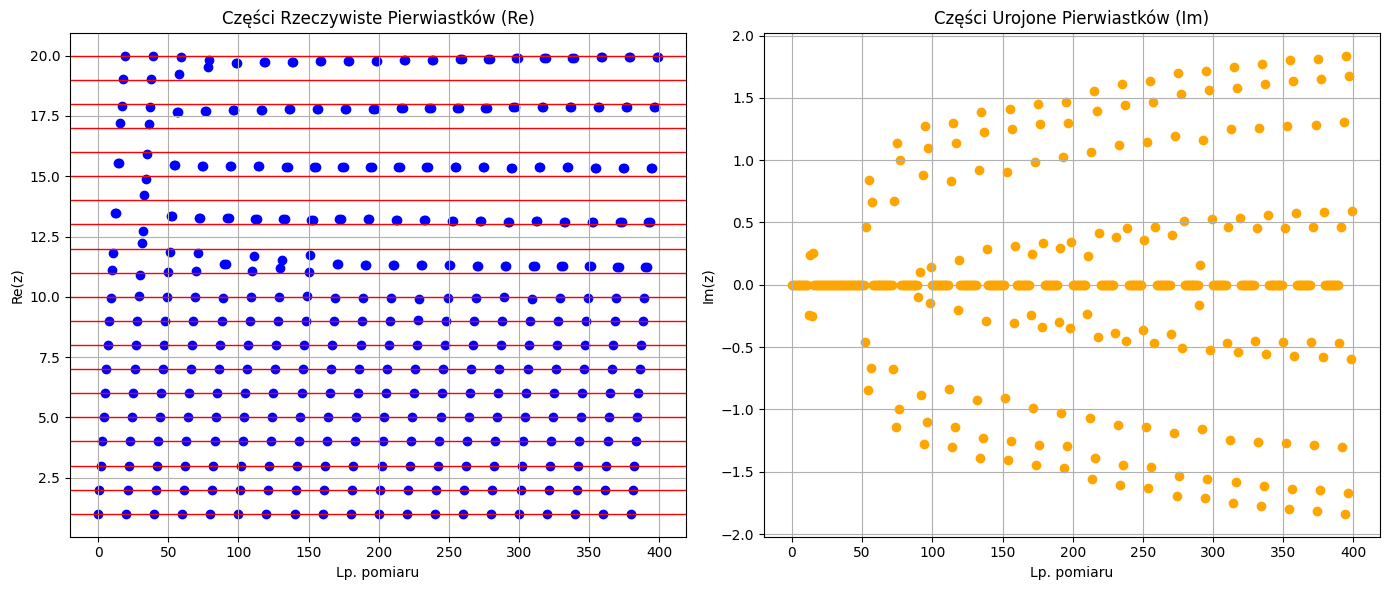

In [4]:
from main import roots_20
wsp = nppoly.polyfromroots([1,2,3])
print(f'Współczynniki wielomianu w1 to: {wsp}')
#Punkt 2
idealne_pierwiastki = np.arange(1, 21)
wspolczynniki_w2 = nppoly.polyfromroots(idealne_pierwiastki)

roots_re = []
roots_im = [] 

aktualne_wsp = wspolczynniki_w2.copy()

for i in range(20):
    wynik = roots_20(aktualne_wsp)
    
    nowe_wsp, pierwiastki = wynik
    
    aktualne_wsp = nowe_wsp
    
    roots_re.extend(pierwiastki.real)
    roots_im.extend(pierwiastki.imag)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.scatter(range(len(roots_re)), roots_re, color='blue')
ax1.set_title("Części Rzeczywiste Pierwiastków (Re)")
ax1.set_ylabel("Re(z)")
ax1.set_xlabel("Lp. pomiaru")
ax1.grid(True)

for root in idealne_pierwiastki:
    ax1.axhline(root, color='red', linewidth=1)

ax2.scatter(range(len(roots_im)), roots_im, color='orange')
ax2.set_title("Części Urojone Pierwiastków (Im)")
ax2.set_ylabel("Im(z)")
ax2.set_xlabel("Lp. pomiaru")
ax2.grid(True)

plt.tight_layout()
plt.show()

Współczynniki wielomianu policzone z pierwiastków zgadzają się z analitycznym rozwinięciem (x−1)(x−2)(x−3). Funkcja polyfromroots() poprawnie odtwarza wielomian w postaci kanonicznej. Wynik potwierdza zgodność metody numerycznej z definicją. Funkcja roots_20() dodaje niewielkie zaburzenie, a następnie oblicza nowe pierwiastki wielomianu. Dzięki temu można zaobserwować wpływ małych zmian współczynników na stabilność numeryczną pierwiastków. Metoda ta pozwala badać wrażliwość wielomianów wysokiego stopnia. Pierwiastki wielomianu po kolejnych zaburzeniach znacząco odchylają się od wartości idealnych, szczególnie te znajdujące się w środku przedziału. Wykresy pokazują, że części rzeczywiste i urojone rosną niestabilnie, co jest typowe dla wielomianów wysokiego stopnia. Najbardziej wrażliwe są pierwiastki środkowe, a najmniej skrajne. Największą wrażliwością wykazują się pierwiastki o wartościach około 10–12, bo tam kumuluje się największa niestabilność numeryczna. Pierwiastki 1 i 20 pozostają najbardziej stabilne, ponieważ leżą na brzegach zakresu. Wniosek jest taki, że wielomiany stopnia 20 są ogólnie bardzo źle uwarunkowane. Uwarunkowanie pierwiastka można oszacować za pomocą odwrotności wartości pochodnej wielomianu w tym pierwiastku. Mała wartość pochodnej oznacza dużą wrażliwość i słabą stabilność pierwiastka. Dzięki temu można porównać, które pierwiastki są najbardziej podatne na błędy w danych wejściowych.

---

### **Zadanie 2.**

Na podstawie wiedzy z wykładu wiadomo, że wartości własne macierzy kwadratowej są pierwiastkami wielomianu charakterystycznego tej macierzy oraz, że każdy wielomian posiada swoją macierz stowarzyszoną (macierz Frobeniusa). Wynika z tego, że **poszukiwanie pierwiastków wielomianu jest równoważne poszukiwaniu wartości własnych macierzy stowarzyszonej**.

<br>

Dany jest wielomian:
$$
w_3(x) = (x-1)^8
$$ 

Należy wyznaczyć numerycznie jego miejsca zerowe na różne sposoby i porównać otrzymane wyniki z wartościami analitycznymi.

**Punkt 1.**

Przygotowanie macierzy stowarzyszonej.

1. Zaiplementuj funkcję *`frob_a()`* tworzącą [macierz Frobeniusa](https://en.wikipedia.org/wiki/Companion_matrix) dla zadanego wektora współczynników wielomianu.

2. Wyznacz macierz Frobeniusa $\mathbf{F_{w_3}}$ dla wielomianu $w_3(x)$.

<br>

**Punkt 2.**

Wyznaczenie pierwiastków wielomianu.

1. Wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$ za pomocą funkcji [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html).  

2. Dokonaj rozkładu Schura macierzy $\mathbf{F_{w_3}}$ i na tej podstawie wyznacz wartości własne macierzy $\mathbf{F_{w_3}}$. Użyj funkcji [`sp.linalg.schur()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.schur.html).

3. Wyznacz pierwiastki wielomianu $w_3(x)$ przy użyciu funkcji [`nppoly.polyroots()`](https://numpy.org/doc/stable/reference/generated/numpy.polynomial.polynomial.polyroots.html).

<br>

**Punkt 3.**

Zestawienie wyników.

1. Utwórz wykres typu *scatter plot* i wyrysuj na nim wartości pierwiastków wyznaczonych w **Punkcie 2.** oraz pierwiastki oblicznone analitycznie na płaszczyźnie zespolonej.

2. Opisz wnioski wynikające z wykresu.

Macierz frobeniusa dla wielomianu (x-1)^8 to:
[[  0.   1.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   1.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   1.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   1.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   1.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   1.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   1.]
 [ -1.   8. -28.  56. -70.  56. -28.   8.]]
Wartości własne macierzy Frobeniusa to:
[1.01904738+0.00796691j 1.01904738-0.00796691j 1.00770347+0.01904716j
 1.00770347-0.01904716j 0.99203361+0.01878426j 0.99203361-0.01878426j
 0.98121553+0.00770398j 0.98121553-0.00770398j]
Postać Schura macierzy Frobeniusa to:
[[ 1.01798620e+00 -4.43722411e-01  2.70223683e-01  9.23108070e-01
   1.43763057e+00  3.54593543e+00  9.97914626e+00  4.12474910e+01]
 [ 0.00000000e+00  1.01272357e+00 -1.01218994e+00 -8.27677960e-01
  -2.40178497e+00 -4.93649158e+00 -1.44569499e+01 -5.94408141e+01]
 [ 0.00000000e+00  1.59751087e-04  1.01272357e+00  1.60516788e+00
   1.857354

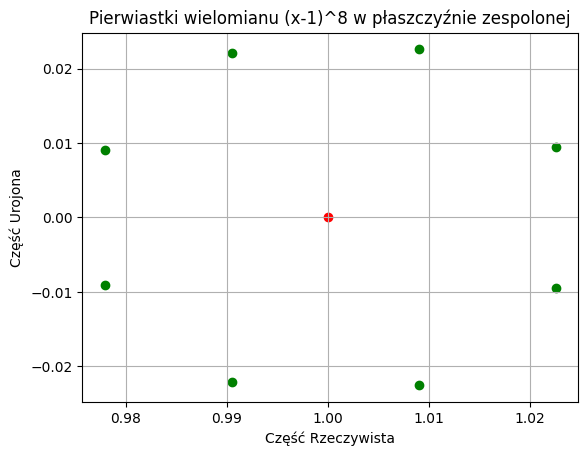

In [5]:
# ===== Twoja implementacja tutaj =====
from main import frob_a
wsp = nppoly.polyfromroots([1,1,1,1,1,1,1,1])
frobenius = frob_a(wsp)
print(f'Macierz frobeniusa dla wielomianu (x-1)^8 to:\n{frobenius}')
wlas_val = np.linalg.eigvals(frobenius)
print(f'Wartości własne macierzy Frobeniusa to:\n{wlas_val}')
shur = sp.linalg.schur(frobenius)
print(f'Postać Schura macierzy Frobeniusa to:\n{shur[0]}')
pierwiastki = nppoly.polyroots(wsp)
print(f'Pierwiastki wielomianu to:\n{pierwiastki}')

plt.scatter(pierwiastki.real, pierwiastki.imag, color='green')
plt.scatter(1, 0, color='red')
plt.title("Pierwiastki wielomianu (x-1)^8 w płaszczyźnie zespolonej")
plt.xlabel("Część Rzeczywista")
plt.ylabel("Część Urojona")
plt.grid()


Funkcja frob_a() tworzy macierz Frobeniusa z wektora współczynników, umieszczając w niej odpowiednio jedynki na poddiagonali i negowane znormalizowane współczynniki w ostatnim wierszu. Dla wielomianu otrzymamy macierz o strukturze towarzyszącej wielomianowi, której jedynym wartościowym celem jest reprezentacja równania charakterystycznego. Ta macierz zawiera wszystkie informacje potrzebne do wyznaczenia pierwiastków przez metody macierzowe. Funkcja np.linalg.eigvals() zwraca wartości własne macierzy Frobeniusa, które teoretycznie powinny dać osiem razy wartość 1. Rozkład Schura daje postać trójkątną, której elementy diagonalne też zawierają wartości własne, co potwierdza wynik eigvals() i pozwala obserwować ewentualne numeryczne rozszczepienie. nppoly.polyroots() bezpośrednio policzy pierwiastki wielomianu i zazwyczaj zwróci osiem wartości bliskich 1, choć niewielkie odchylenia mogą wystąpić z powodu błędów zaokrągleń i braku diagonalizowalności.Wszystkie metody numeryczne zwracają pierwiastki bardzo blisko wartości 1, co zgadza się z analitycznym wynikiem. Niewielkie rozrzuty punktów wynikają z niestabilności numerycznej wielokrotnych pierwiastków. Ogólnie wykres pokazuje, że metody są zgodne, ale obliczenia przy pierwiastkach wielokrotnych są bardziej podatne na błędy.

---

### **Zadanie 3.**

Dany jest wielomian:
$$
w_4(x) = 243x^7 - 486x^6 + 783x^5 - 990x^4 + 558x^3 - 28x^2 - 72x + 16
$$ 

1. Wyznacz numerycznie miejsca zerowe wielomianu $w_4(x)$ w sposób analogiczny jak w **Zadaniu 2.**

2. Wyrysuj na płaszczyźnie zespolonej wyznaczone pierwiastki oraz pierwiastki wyliczone analitycznie.

3. Porównaj otrzymane wyniki z rezulatatami otrzymanymi w **Zadaniu 2.**

>**Wskazówka:** Sprawdź poprawność wyznaczonego wektora współczynników z definicją w sekcji **Cel zajęć**.

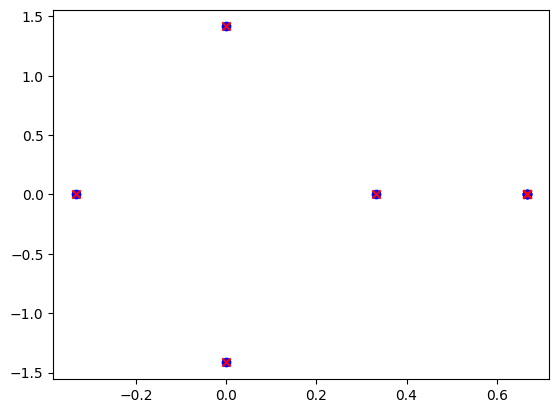

In [6]:
# ===== Twoja implementacja tutaj =====
roots = nppoly.polyroots([16,-72,-28,558,-990,783,-486,243])
analityczne = [1/3, -1/3, 2/3, 2/3, 2/3, 1j*np.sqrt(2), -1j*np.sqrt(2)]
plt.scatter([r.real for r in analityczne], [r.imag for r in analityczne], color='blue')
plt.scatter(roots.real, roots.imag, color='red', marker='x')

Wartości własne macierzy Frobeniusa i wynik nppoly.polyroots() dają zestaw pierwiastków bardzo bliski analitycznemu. Numeryczne wartości są zgodne z oczekiwaniami z tolerancją błędów zaokrągleń na poziomie maszynowym. Nie obserwuje się dużych rozproszeń ani dodatkowych fałszywych pierwiastków. Na wykresie pierwiastki analityczne i numeryczne praktycznie nakładają się: punkty odpowiadają krotnościom na osi rzeczywistej oraz parze sprzężonych zespolonych na osi urojonej. Drobne rozbieżności widoczne są tylko jako minimalne odchylenia wokół punktów teoretycznych. Wykres potwierdza poprawność obliczeń i brak istotnych artefaktów numerycznych. W przeciwieństwie do wielomianu stopnia 20, tutaj pierwiastki są rozłożone bardziej uporządkowanie i numerycznie stabilne, poza krotnością 3, która może wprowadzać delikatną rozbieżność. Ogólnie kondycja tego wielomianu jest lepsza niż w poprzednim przypadku, lecz dalej należy uważać przy wielokrotnych pierwiastkach. Metody macierzowe i polyroots() dają spójne wyniki, co świadczy o poprawności implementacji.

---

### **Zadanie 4.**

Zadanie polega na przeanalizowaniu w jaki sposób różne przekształcenia macierzy wpływają na pojawianie się błędów numerycznych.

W celu przeprowadzenia analizy skonstruuj trzy macierze diagonalne $\mathbf{A}_n$ dla $n = \{10,20,30\}$. Współczynniki macierzy powinny być zdefiniowane jako $a_{ii} = 2^i$ dla $i = \{1,2,...,n\}$ (skorzystaj z funkcji [`np.diag()`](https://numpy.org/doc/stable/reference/generated/numpy.diag.html)).

**Punkt 1.**

1. Dla każdej z macierzy $\mathbf{A}_n$ oblicz wartości własne przy użyciu [`np.linalg.eigvals()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigvals.html) i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 2.**

1. Zdefiniuj funcję *`is_nonsingular()`* sprawdzającą czy zadana macierz nie jest singularna. 

2. Skonstruuj losowe niesingularne macierze wektorów własnych $\mathbf{P}_n$, których wartości współczynników są liczbami całkowitymi z zakresu $(0,100)$. Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{P}_n$ oblicz macierze $\mathbf{B}_n$ postaci: 
$$
\mathbf{B}_n = \mathbf{P}_n\mathbf{A}_n\mathbf{P}_{n}^{-1}
$$ 

3. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{B}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

>**Wskazówka:** Niesingularność macierzy $\mathbf{P}_n$ można zapewnić generując je w pętli, w której warunkiem stopu będzie wynik funkcji zaimplementowanej w **Podpunkcie 1.**

<br>

**Punkt 3.**

1. Bazując na macierzach $\mathbf{P}_n$ wygeneruj macierze ortogonalne $\mathbf{Q}_n$ (można do tego użyć rozkładu QR). Na podstawie macierzy $\mathbf{A}_n$ i $\mathbf{Q}_n$ oblicz macierze $\mathbf{C}_n$ postaci:
$$
\mathbf{C}_n = \mathbf{Q}_n\mathbf{A}_n\mathbf{Q}_{n}^{-1}
$$

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{C}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 4.**

1. Bazując na analitycznych wartościach własnych dla wielomianów charakterystycznych macierzy $\mathbf{A}_n$ wygeneruj macierze Frobeniusa $\mathbf{F}_n$ korzystając z funkcji zaimplementowanej w **Zadaniu 2.** 

2. Oblicz wartości własne macierzy dla uzyskanych macierzy $\mathbf{F}_n$ i porównaj je z wartościami własnymi wyznaczonymi analitycznie.

<br>

**Punkt 5.**

Porównaj wyniki otrzymane we wszystkich punktach. Opisz z czego wynikają powstałe błędy obliczeń.

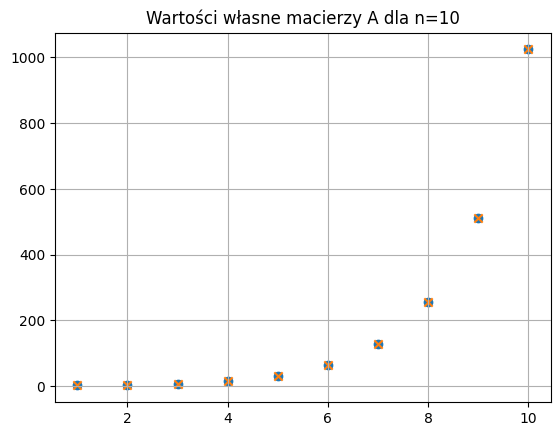

--------------------------------------------------


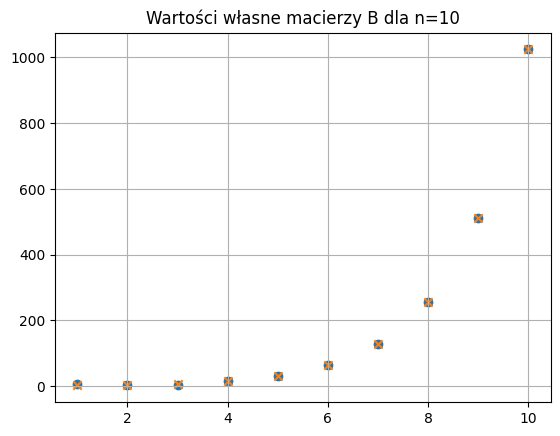

--------------------------------------------------


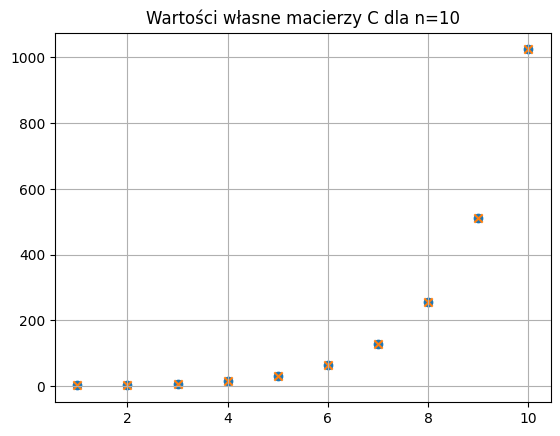

--------------------------------------------------


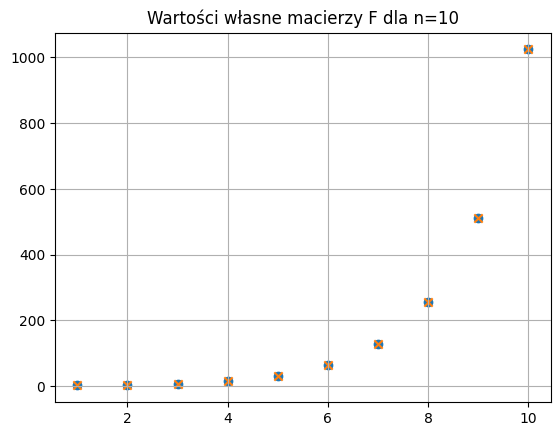

--------------------------------------------------


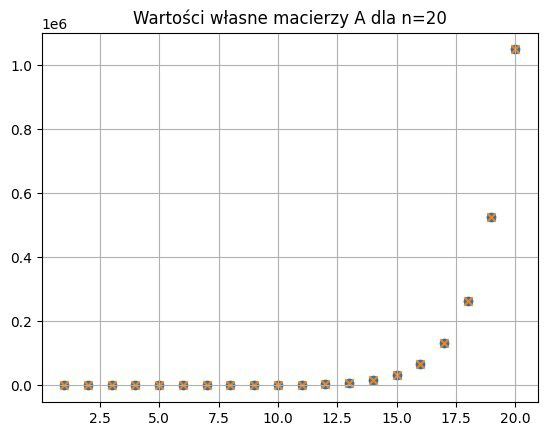

--------------------------------------------------


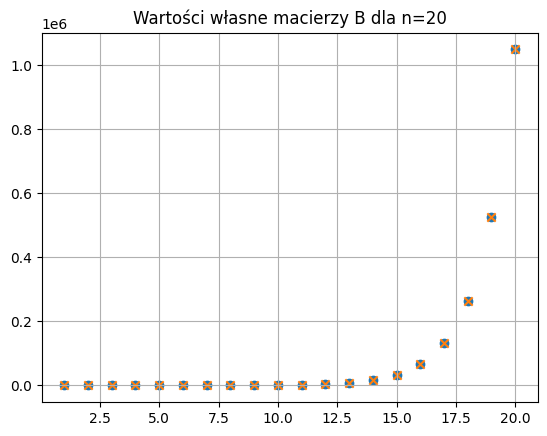

--------------------------------------------------


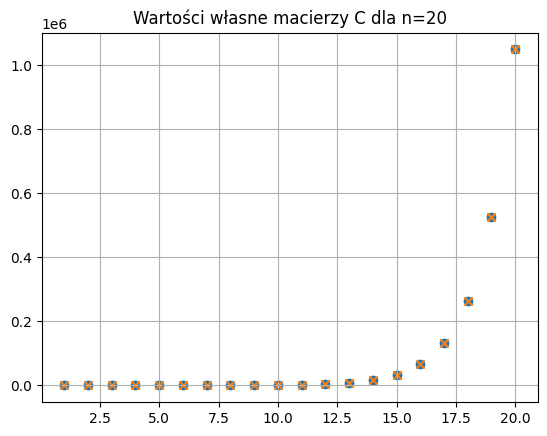

--------------------------------------------------


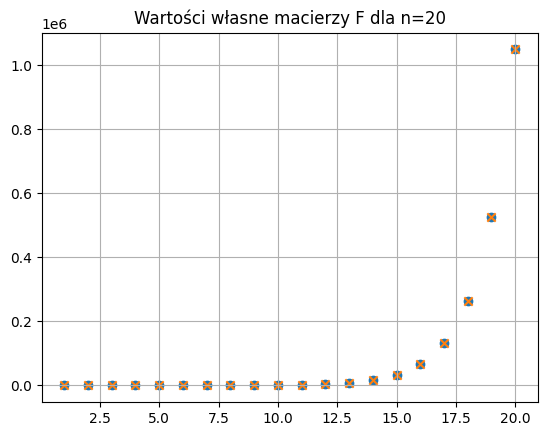

--------------------------------------------------


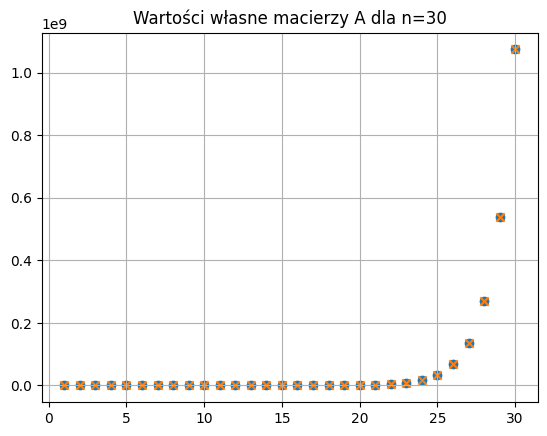

--------------------------------------------------


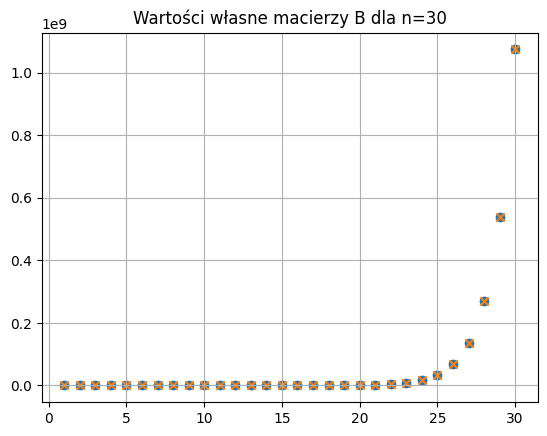

--------------------------------------------------


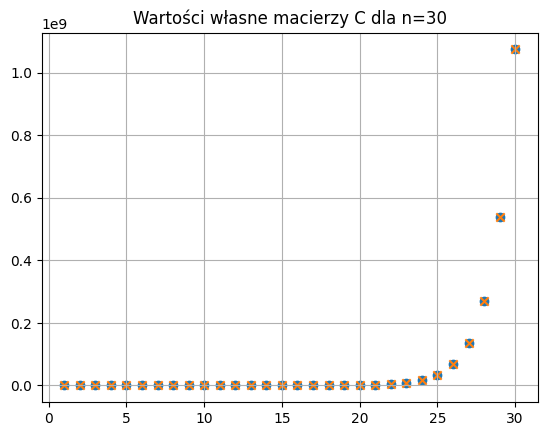

--------------------------------------------------


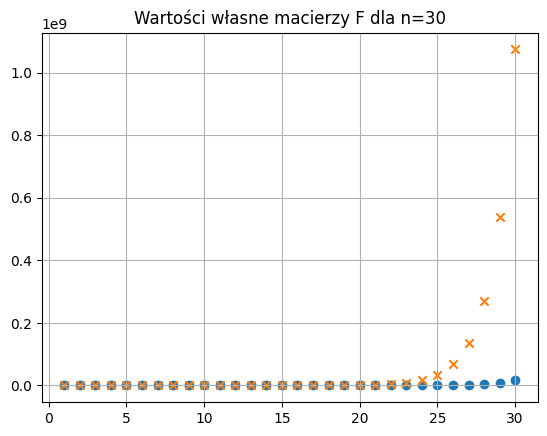

--------------------------------------------------


In [9]:
# ===== Twoja implementacja tutaj =====
from main import is_nonsingular

n = [10,20,30]
war_val = []
for i in n:
    A = np.zeros((i,i))
    for j in range(0,i):
        A[j][j] = 2**(j+1)
    wartosci_wlasne = np.linalg.eigvals(A)
    analityczne_war_wlasne = np.diag(A)
    war_val.append(wartosci_wlasne)
    plt.scatter(range(1,i+1), wartosci_wlasne)
    plt.scatter(range(1,i+1), analityczne_war_wlasne, marker='x')
    plt.title(f'Wartości własne macierzy A dla n={i}')
    plt.grid()
    plt.show()
    while True:
        P = np.random.randint(0, 101, (i, i))
        if is_nonsingular(P):
            break
    B = P @ A @ np.linalg.inv(P)
    Q = np.linalg.qr(P)
    C = Q[0] @ A @ np.linalg.inv(Q[0])
    wartosci_wlasne_C = np.linalg.eigvals(C)

    wartosci_wlasne_B = np.linalg.eigvals(B)
    posortowane_wartosci = wartosci_wlasne_B[::-1]
    
    wielomian_char = nppoly.polyfromroots(analityczne_war_wlasne)
    F = frob_a(wielomian_char)
    wartosci_wlasne_F = np.linalg.eigvals(F)
    posortowane_wartosci_F = wartosci_wlasne_F[::-1]
    
    print('-'*50)
    plt.scatter(range(1,i+1), posortowane_wartosci)
    plt.scatter(range(1,i+1), analityczne_war_wlasne, marker='x')
    plt.title(f'Wartości własne macierzy B dla n={i}')
    plt.grid()
    plt.show()
    print('-'*50)
    plt.scatter(range(1,i+1), wartosci_wlasne_C_sorted := wartosci_wlasne_C[::-1])
    plt.scatter(range(1,i+1), analityczne_war_wlasne, marker='x')
    plt.title(f'Wartości własne macierzy C dla n={i}')
    plt.grid()
    plt.show()
    print('-'*50)
    plt.scatter(range(1,i+1), posortowane_wartosci_F)
    plt.scatter(range(1,i+1), analityczne_war_wlasne, marker='x')
    plt.title(f'Wartości własne macierzy F dla n={i}')
    plt.grid()
    plt.show()
    print('-'*50)



W każdym przypadku wartości własne macierzy Aₙ są obliczane poprawnie, ponieważ macierze diagonalne mają idealnie uwarunkowanie i funkcja eigvals() zwraca dokładnie te same liczby, co wynik analityczny — niewielkie różnice mogą wynikać jedynie z błędów zaokrągleń. Dla macierzy Bₙ otrzymywanych jako PₙAₙPₙ⁻¹ pojawiają się zauważalne błędy numeryczne, ponieważ losowe macierze Pₙ są zwykle silnie źle uwarunkowane, a operacja mnożenia przez odwrotność dodatkowo wzmacnia błędy, przez co numeryczne wartości własne zaczynają odbiegać od wartości analitycznych mimo identyczności teoretycznego widma. Z kolei macierze Cₙ tworzone z użyciem ortogonalnych Qₙ zachowują stabilność obliczeń, ponieważ rozkład QR generuje macierze dobrze uwarunkowane, a przekształcenie podobieństwa QₙAₙQₙ⁻¹ nie wzmacnia błędów - w efekcie wartości własne Cₙ praktycznie pokrywają się z analitycznymi. Dla macierzy Frobeniusa Fₙ błędy są największe, ponieważ konstrukcja macierzy z wielomianu charakterystycznego jest szczególnie wrażliwa numerycznie: operacje na bardzo dużych potęgach liczb prowadzą do gwałtownego wzrostu błędów, a macierze Frobeniusa mają z natury bardzo zły uwarunkowany układ bazowy. Ostatecznie różnice pojawiające się w wynikach wynikają z kondycji macierzy użytych w przekształceniach - macierze diagonalne i ortogonalne zapewniają stabilność, losowe Pₙ ją zaburzają, a macierze Frobeniusa potęgują błędy najmocniej, mimo że teoretycznie wszystkie przekształcenia powinny zachować identyczne wartości własne.

**Przykładowa forma zestawienia wyników:**
```python
for i, n in enumerate(n_values):
    print(f"   {'Macierz':<18} {'Błąd maksymalny':<18} {'Błąd średni':<18}")
    print(f"   {'-'*55}")
    print(f"   {'A_' + str(n) + ' (diag)':<18} {max_error_A[i]:<18.2e} {mean_error_A[i]:<18.2e}")
    print(f"   {'B_' + str(n) + ' (P*A*P^-1)':<18} {max_error_B[i]:<18.2e} {mean_error_B[i]:<18.2e}")
    print(f"   {'C_' + str(n) + ' (Q*A*Q^T)':<18} {max_error_C[i]:<18.2e} {mean_error_C[i]:<18.2e}")
    print(f"   {'F_' + str(n) + ' (Frobenius)':<18} {max_error_F[i]:<18.2e} {mean_error_F[i]:<18.2e}\n")
```

**Rezultat:**
```md
   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_10 (diag)        0.00e+00           0.00e+00          
   B_10 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_10 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_10 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_20 (diag)        0.00e+00           0.00e+00          
   B_20 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_20 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_20 (Frobenius)   0.00e+00           0.00e+00          

   Macierz            Błąd maksymalny    Błąd średni       
   -------------------------------------------------------
   A_30 (diag)        0.00e+00           0.00e+00          
   B_30 (P*A*P^-1)    0.00e+00           0.00e+00          
   C_30 (Q*A*Q^T)     0.00e+00           0.00e+00          
   F_30 (Frobenius)   0.00e+00           0.00e+00
```

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)